In [1]:
%cd ../fiberphotopy/

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


In [224]:
import importlib
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import pprint
import scipy
import time


import fp_utils
import behavioral_data
import fiber_data
import analysis

def rel():
    importlib.reload(behavioral_data)
    importlib.reload(fiber_data)
    importlib.reload(analysis)
    importlib.reload(fp_utils)
rel()

# Brouillons

In [4]:
%ls

 Le volume dans le lecteur C s’appelle System
 Le numéro de série du volume est A698-0041

 Répertoire de C:\Users\mceau\Documents\fiberphotopy\fiberphotopy

17/03/2022  13:21    <DIR>          .
17/03/2022  13:21    <DIR>          ..
16/03/2022  17:03    <DIR>          .ipynb_checkpoints
16/03/2022  15:08                 0 __init__.py
17/03/2022  13:21    <DIR>          __pycache__
16/03/2022  15:59             9 610 analysis.py
17/03/2022  13:21            21 944 behavioral_data.py
16/03/2022  15:59             8 830 fiber_data.py
16/03/2022  17:03             1 397 fp_utils.py
11/03/2022  10:49             6 929 info.py
               6 fichier(s)           48 710 octets
               4 Rép(s)  915 446 509 568 octets libres


In [6]:
b = behavioral_data.BehavioralData('../../DATA/Habituation1j1603202201rat25.dat')

In [771]:
p08.__dict__

{'hello': 'Hi',
 'configfile': 'config.yaml',
 'config': {'USER': {'GENERAL': {'rat_ID': 'Not specified',
    'file_unit': False,
    'user_unit': 's',
    'experiment_duration': {'min': 29, 'max': 28999}},
   'BEHAVIOR': {'fixed_ratio': 5,
    'close_interval': 5,
    'elements': {'HLED_OFF': [True, 'Drug Period', '#069AF3'],
     'HLED_ON': [True, 'No Drug Period', 'gold'],
     'TTL1_ON': [True, 'Fiber Photometry Recordings', 'g'],
     'np1': [True, 'Active Nosepokes', 'r'],
     'np2': [True, 'Inactive Nosepokes', 'b'],
     'inj1': [True, 'Injections', 'k'],
     'LED1_ON': [True, 'Conditioned Stimulus', 'goldenrod'],
     'LED1_OFF': [False, 'LED1_OFF', ['darkgray', 'darkgrey']],
     'LED2_OFF': [False, 'LED2_OFF', 'slategrey'],
     'LED2_ON': [True, ' Drug Light On', 'slategrey'],
     'DARK': [False, 'DARK', 'k'],
     'TO_DARK': [False, 'TO_DARK', 'olivedrab'],
     'NOTO_DARK': [False, 'NOTO_DARK', 'black'],
     'TIMEOUT': [True, 'Time outs', 'k'],
     'switch_d_nd': [Fa

# Analysis

In [4]:
%ls

 Le volume dans le lecteur C s’appelle System
 Le numéro de série du volume est A698-0041

 Répertoire de C:\Users\mceau\Documents\fiberphotopy\fiberphotopy

21/03/2022  15:58    <DIR>          .
21/03/2022  15:58    <DIR>          ..
22/03/2022  09:45    <DIR>          .ipynb_checkpoints
16/03/2022  15:08                 0 __init__.py
21/03/2022  15:58    <DIR>          __pycache__
21/03/2022  15:58            11 992 analysis.py
21/03/2022  14:14            22 687 behavioral_data.py
21/03/2022  14:13               593 bsa09032022c20_02.csv
21/03/2022  15:02             8 896 fiber_data.py
16/03/2022  17:03             1 397 fp_utils.py
17/03/2022  14:11             6 965 info.py
               7 fichier(s)           52 530 octets
               4 Rép(s)  924 157 251 584 octets libres


In [225]:
rel()
an = analysis.RatSession(fiber='../../DATA/test_data/rat12_SA1/AS21RSA1Rat1201032022_0.csv',
                       behavior='../../DATA/test_data/rat12_SA2/bsa04032022c20_01.dat')

In [226]:
an.analyze_perievent(an.behavior.np1[0])

<obj>.event_time
<obj>.fiberfile
<obj>.behaviorfile
<obj>.normalisation
<obj>.rec_number
<obj>.window
<obj>.recordingdata
<obj>.rawdata
<obj>.data
<obj>.raw_signal
<obj>.raw_control
<obj>.signal
<obj>.time
<obj>.sampling_rate
<obj>.postevent
<obj>.pre_raw_sig
<obj>.post_raw_sig
<obj>.post_raw_ctrl
<obj>.post_time
<obj>.preevent
<obj>.pre_time
<obj>.zscores
<obj>.pre_zscores
<obj>.post_zscores
<obj>.rob_zscores
<obj>.pre_Rzscores
<obj>.post_Rzscores
<obj>.preAVG_Z
<obj>.postAVG_Z
<obj>.preAVG_RZ
<obj>.postAVG_RZ
<obj>.pre_raw_AUC
<obj>.post_raw_AUC
<obj>.preAUC
<obj>.postAUC
<obj>.preZ_AUC
<obj>.postZ_AUC
<obj>.preRZ_AUC
<obj>.postRZ_AUC

In [227]:
res = list(an.analyses.values())[0]

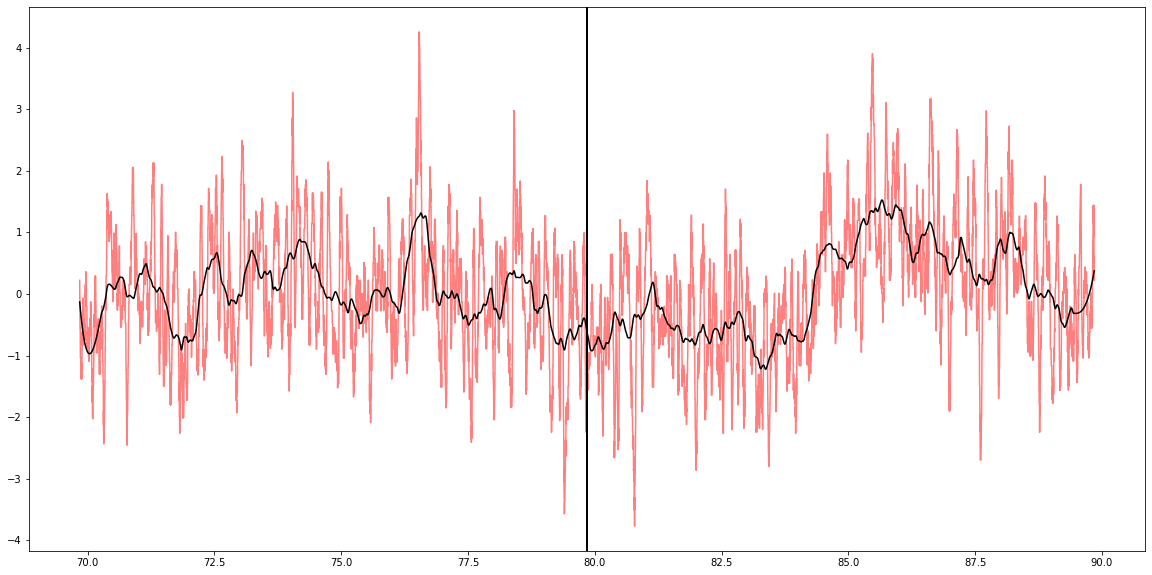

In [229]:
res.plot('zscores',smth_window=1000)

No fiber recording at this timestamp
No fiber recording at this timestamp
No fiber recording at this timestamp
No fiber recording at this timestamp
No fiber recording at this timestamp
No fiber recording at this timestamp
No fiber recording at this timestamp
No fiber recording at this timestamp


{'a': 1, 'alpha': 0.4}

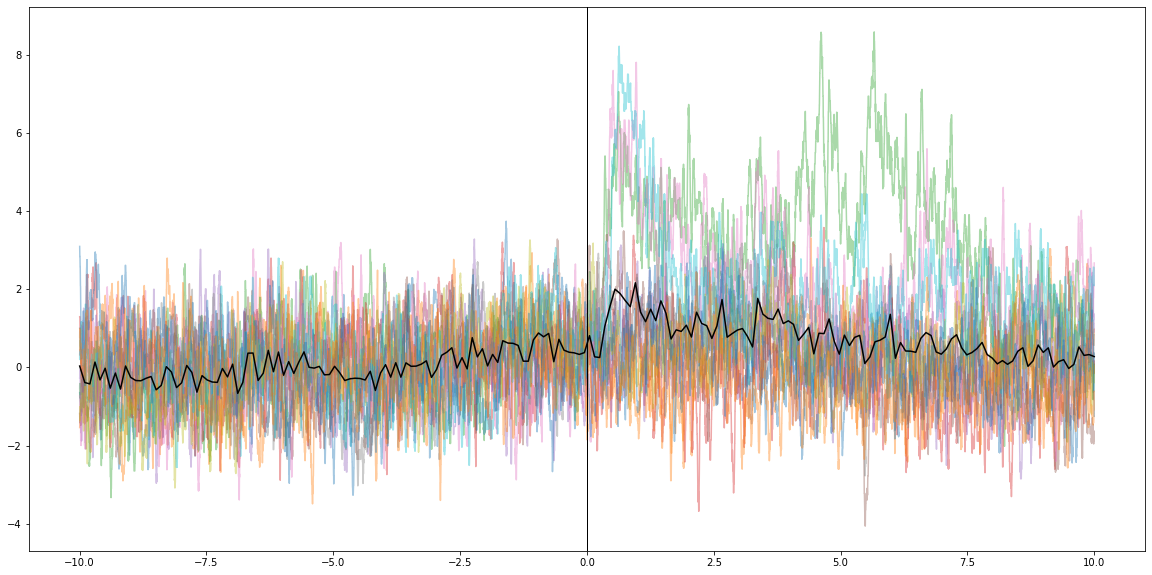

In [191]:
rel()
test = analysis.MultiSession("../../DATA/test_data")
multi = test.analyze('led2_off')
plot_data_and_mean(1000,(-10,10),multi.epoch,multi.zscores,mean_sampling=10,a=1,alpha=0.4)

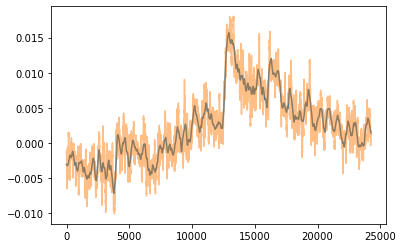

In [200]:
plt.plot(test._savgol(multi.SIGNAL,500,3))
plt.plot(multi.SIGNAL,alpha=0.5)

(24248,)

In [116]:
multi.raw_signal

[array([0.16632588, 0.16632588, 0.16632588, ..., 0.16510514, 0.16541032,
        0.16510514]),
 array([0.17670217, 0.17670217, 0.17670217, ..., 0.18280587, 0.18280587,
        0.18280587]),
 array([0.17670217, 0.17670217, 0.17670217, ..., 0.18280587, 0.18280587,
        0.18280587]),
 array([0.1638844 , 0.16357921, 0.16357921, ..., 0.16693625, 0.16693625,
        0.16693625])]

In [254]:
rel()
test = analysis.MultiSession("../../DATA/test_data")
multi = test.analyze(['switch_d_nd','switch_to_nd'])
#plot_data_and_mean(1000,(-10,10),multi.epoch,multi.raw_signal,mean_sampling=10,a=1,alpha=0.4)

No fiber recording at this timestamp
No fiber recording at this timestamp


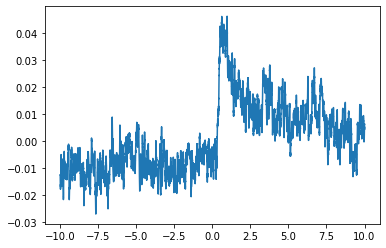

In [170]:
plt.plot(multi.EPOCH,multi.SIGNAL)

In [158]:
multi.EPOCH

array([], dtype=float64)

In [159]:
multi.EPOCH = np.linspace(multi.window[0],
                         multi.window[1],
                         round(multi.SAMPLING*(multi.window[1]-multi.window[0])))

{}

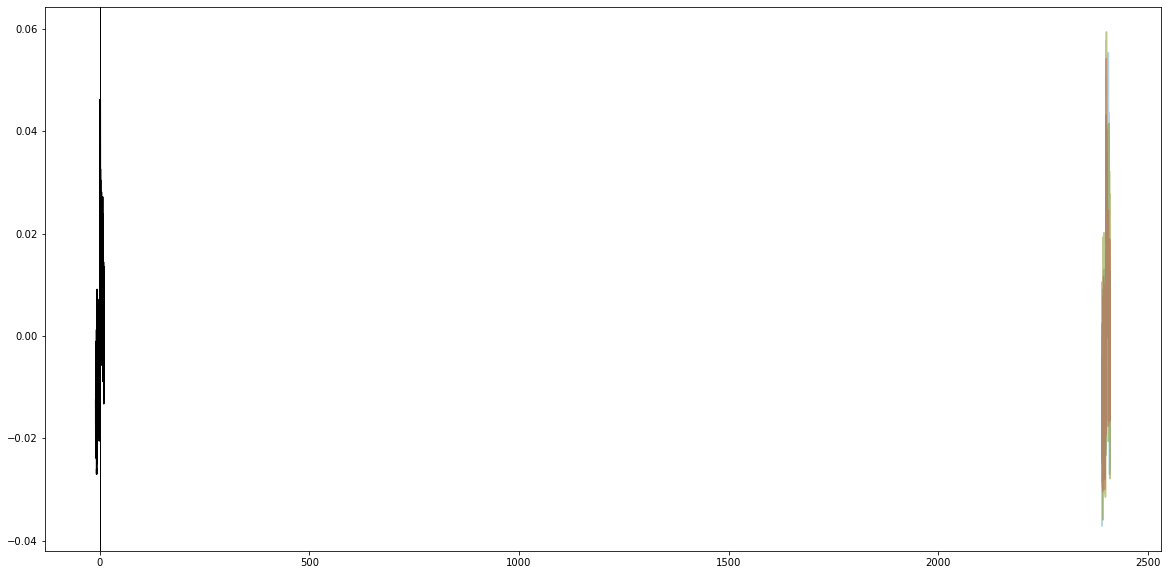

In [255]:
multi.plot()

{'a': 1, 'alpha': 0.4}

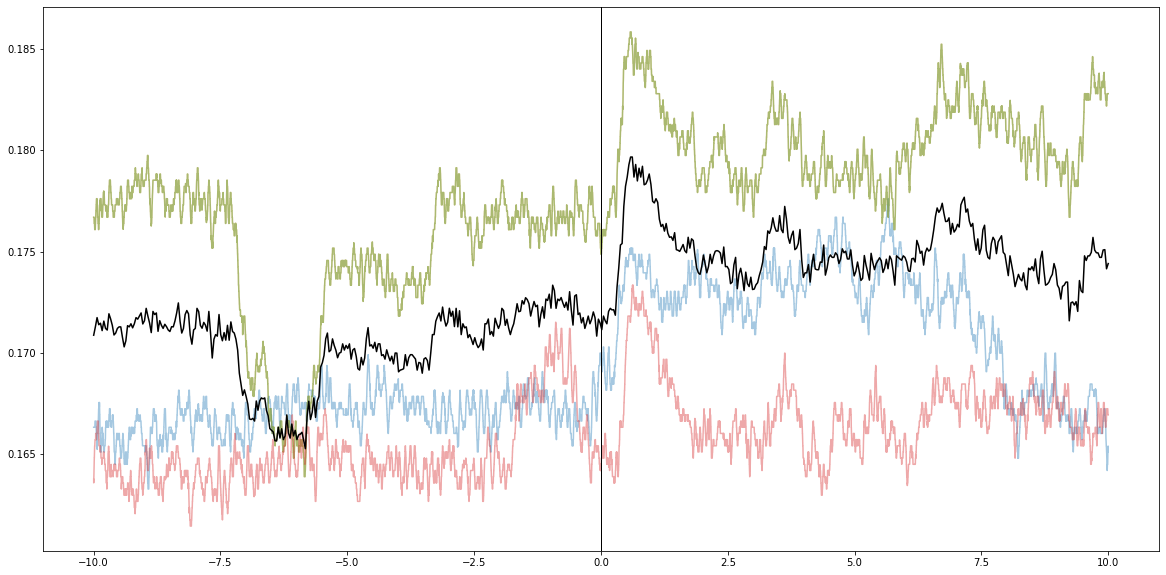

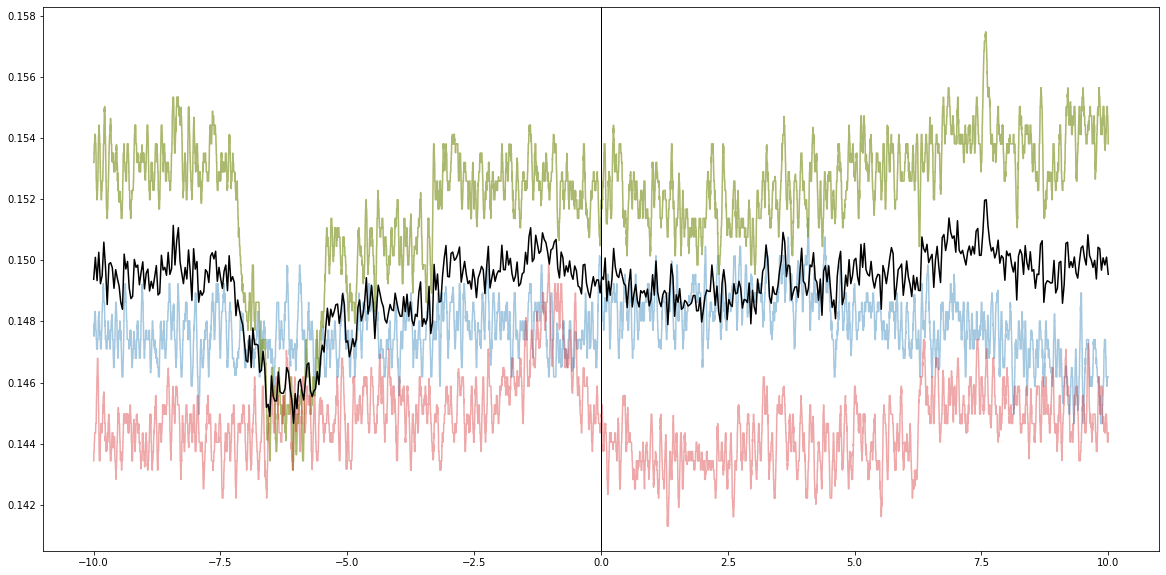

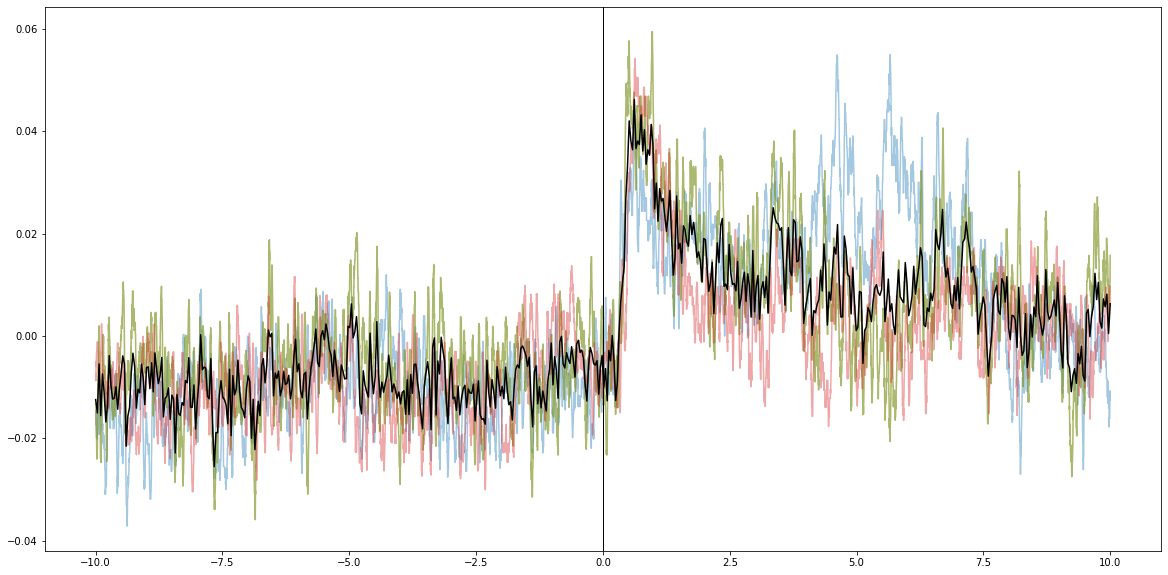

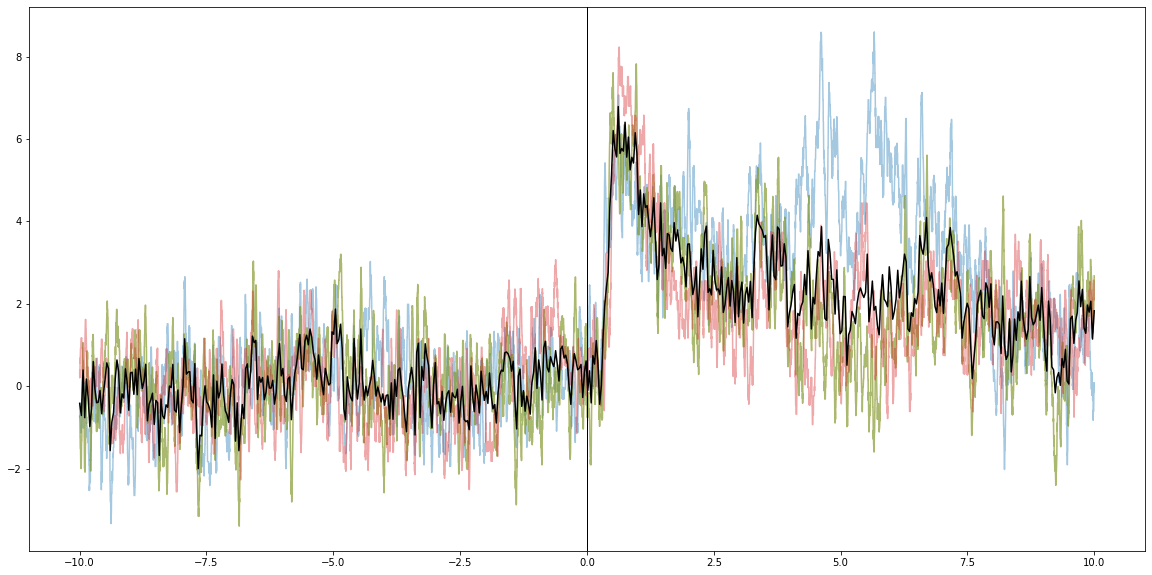

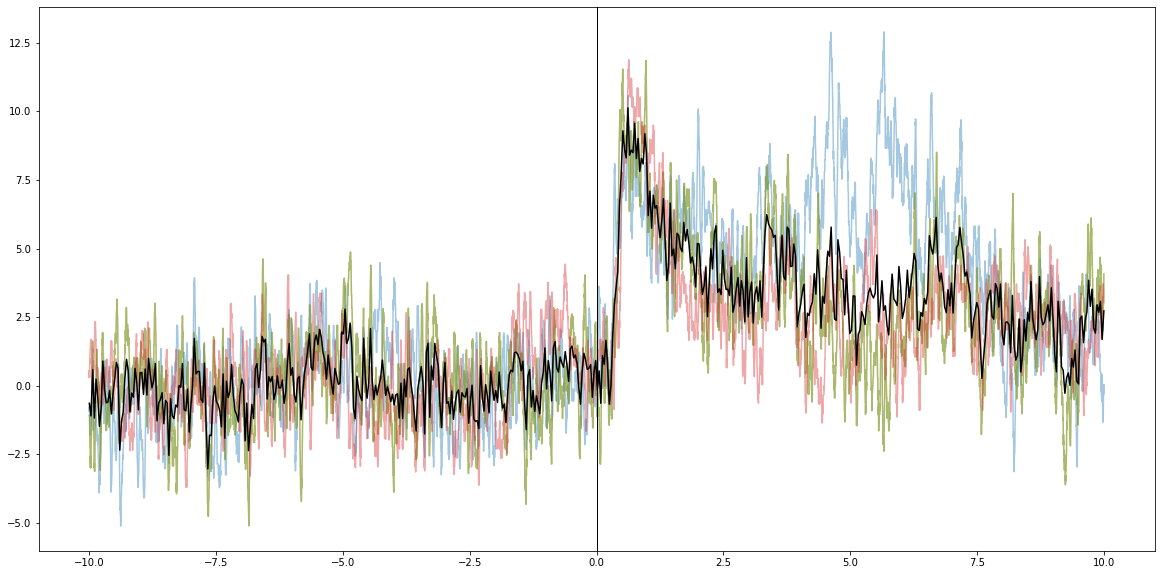

In [250]:
#multi = test.analyze('led2_off',interval='TIMEOUT')
plot_data_and_mean(1000,(-10,10),multi.epoch,multi.raw_signal,mean_sampling=30,a=1,alpha=0.4)
plot_data_and_mean(1000,(-10,10),multi.epoch,multi.raw_control,mean_sampling=30,a=1,alpha=0.4)
plot_data_and_mean(1000,(-10,10),multi.epoch,multi.signal,mean_sampling=30,a=1,alpha=0.4)
plot_data_and_mean(1000,(-10,10),multi.epoch,multi.zscores,mean_sampling=30,a=1,alpha=0.4)
plot_data_and_mean(1000,(-10,10),multi.epoch,multi.rob_zscores,mean_sampling=30,a=1,alpha=0.4)

In [120]:
multi.__dict__.keys()

dict_keys(['hello', 'configfile', 'config', 'rat_ID', 'file_unit', 'user_unit', 'experiment_duration', 'fixed_ratio', 'close_interval', 'elements', 'split_recordings', 'split_treshold', 'trim_recording', 'default_window', 'default_norm', 'rat_sessions', 'dict', 'event_time', 'rec_number', 'recordingdata', 'rawdata', 'data', 'raw_signal', 'raw_control', 'signal', 'time', 'sampling_rate', 'postevent', 'pre_raw_sig', 'post_raw_sig', 'post_raw_ctrl', 'post_time', 'preevent', 'pre_time', 'zscores', 'pre_zscores', 'post_zscores', 'rob_zscores', 'pre_Rzscores', 'post_Rzscores', 'preAVG_Z', 'postAVG_Z', 'preAVG_RZ', 'postAVG_RZ', 'pre_raw_AUC', 'post_raw_AUC', 'preAUC', 'postAUC', 'preZ_AUC', 'postZ_AUC', 'preRZ_AUC', 'postRZ_AUC', 'epoch'])